## Data Analysis with Python and Pandas

In [11]:
import pandas as pd
import datetime
try:
    import pandas_datareader.data as web
except ImportError:
    pass
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np

import quandl

In [12]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2015, 8, 22)

try:
    df = web.DataReader("XOM", "yahoo", start, end)
except NameError:
    df = pd.read_csv("file_name.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,68.839996,68.860001,68.110001,68.190002,53.863396,18852300
1,2010-01-04,68.720001,69.260002,68.190002,69.150002,54.621700,27809100
2,2010-01-05,69.190002,69.449997,68.800003,69.419998,54.834965,30174700
3,2010-01-06,69.449997,70.599998,69.339996,70.019997,55.308914,35044700
4,2010-01-07,69.900002,70.059998,69.419998,69.800003,55.135132,27192100


In [3]:
# write DataFrame to csv for working offline

# df.to_csv("file_name.csv")

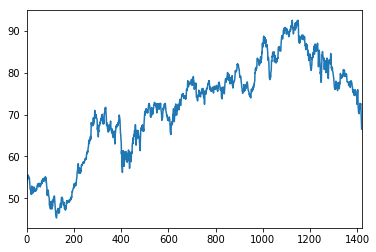

In [4]:
df['Adj Close'].plot()

plt.show()

Pandas can interact with a lot of data types

CSV, SQL, HTML etc

From whatever format u import the data, handling the DataFrame is identical

Applying various operations, calculations and statistical anlysis on a DataFrame is very fast

#### Pandas Basics

In [5]:
style.use('ggplot')

# DF is like apython dict

web_data = {'Day': [1,2,3,4,5,6],
           'Visitors': [43,53,34,45,64,34],
           'Bounce_Rate': [65,72,62,64,54,66]}

# we can convert this to df very easily

df = pd.DataFrame(web_data)



# setting an index

df.set_index("Day")

# the change in index does not reflect here

df.head()

,Bounce_Rate,Day,Visitors
0,65,1,43
1,72,2,53
2,62,3,34
3,64,4,45
4,54,5,64


When u execute ```df.set_index("Day")``` u are returned a ** new ** dataframe

In [6]:
# options 

# df = df.set_axis("Day")

# OR

# print df

# df.set_index("Day", inplace=True)

df

,Bounce_Rate,Day,Visitors
0,65,1,43
1,72,2,53
2,62,3,34
3,64,4,45
4,54,5,64
5,66,6,34


#### Referencing

In [19]:
# referencing multiple columns

df[['Bounce_Rate', 'Visitors']]

# convert o/p to list

print (df['Visitors'].tolist())

KeyError: "['Bounce_Rate' 'Visitors'] not in index"

tolist() works for single cols but not for multiple cols

```
df[['Bounce_Rate', 'Visitors']].tolist()
```
does not work

**We need to convert it to a numpy array**

In [ ]:
print np.array(df[['Bounce_Rate', 'Visitors']])

# Converting numpy array to df

pd.DataFrame(np.array(df[['Bounce_Rate', 'Visitors']]))

#### IO Basics

```kfJuWbUakQJH6gez_VFr```

In [20]:
quandl.get("ZILLOW/Z77006_ZRIFAH", authtoken="kfJuWbUakQJH6gez_VFr")

# read local csv

df = pd.read_csv("ZILLOW-Z77006_ZRIMFRR.csv")

# df.head()

df.set_index('Date', inplace=True)

df.to_csv('newcsv2.csv')

df = pd.read_csv('newcsv2.csv')

df.head()

# we lost our index again

df = pd.read_csv('newcsv2.csv', index_col=0)

df.head()

,Value
Date,
12/31/2017,1447
11/30/2017,1442
10/31/2017,1429
9/30/2017,1429
8/31/2017,1436


In [ ]:
# renaming cols

# Note: Date is not a column anymore as it is an index

df.columns = ['Austing_HPI'] #HPI: House Price Index

df.head()

#### Convert Pandas DataFrame to HTML (Table)

In [ ]:
df.to_html('example.html')

In [ ]:
# fresh df

df = pd.read_csv("ZILLOW-Z77006_ZRIMFRR.csv", names=['Date', 'Austin_HPI'])
df.head()

df.rename(columns={'Austin_HPI': '77006_HPI'}, inplace=True)

df.head()

#### Building Dataset

---

#### Real Estate Analysis

QUANDL API Key: ```kfJuWbUakQJH6gez_VFr```

#### Link to get data from:

[House Price Index Data](https://www.quandl.com/data/FMAC-Freddie-Mac?keyword=House%20Price%20Index)

In Quandl u can limit the data by the **trim_start** param

In [21]:
apiKey = 'kfJuWbUakQJH6gez_VFr'

df = quandl.get('FMAC/HPI_AK', authtoken=apiKey)

df.head()

,Value
Date,
1975-01-31,34.527918
1975-02-28,35.026256
1975-03-31,35.536666
1975-04-30,36.074757
1975-05-31,36.676178


Now we want this to execute for all US states

But we want to automate it

List of US states: [list](https://simple.wikipedia.org/wiki/List_of_U.S._states)

We will use python pandas htm  reader to read this table

In [15]:
fifty_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')

# this will read all the tables and return a list of dataframes

fifty_states[0].head()

# first df is the one we need

,0,1,2,3
0,Abbreviation,State Name,Capital,Became a State
1,AL,Alabama,Montgomery,"December 14, 1819"
2,AK,Alaska,Juneau,"January 3, 1959"
3,AZ,Arizona,Phoenix,"February 14, 1912"
4,AR,Arkansas,Little Rock,"June 15, 1836"


In [16]:
# we want first column

fifty_states[0][0]

# first row contains col header.. we dont want that

for abbr in fifty_states[0][0][1:5]:
    print ("FMAC/HPI_" + str(abbr))

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR


#### Concatenating and Appending DataFrames

In [ ]:
# sample dfs

df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

# df1 and df3 have same indices but diff cols

# df1 and df2 have diff indices but same cols

# df2 and df3 have diff indices and cols

# this is like UNION

concat = pd.concat([df1, df2])

print concat

concat2 = pd.concat([df1, df3, df2])

print concat2

# concat adds to bottom

# but indices are repeated..


In [ ]:
# appending dfs

# append adds to the end

df4 = df1.append(df2)
df4

** Note **: Pandas is meant for data manipulation.. U can add new cols to it
But appending new data to a df is not efficient 

In [ ]:
df5 = df1.append(df3)
df5

#### Adding a Series

In [ ]:
s = pd.Series([80, 2, 50], index=['HPI', 'Int_rate', 'US_GDP_Thousands'])

df6 = df1.append(s, ignore_index=True)

df6

#### Joining and Merging DataFrames

They are kind of similar

But have subtle diff

In [23]:
# sample data


df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

merged1 = pd.merge(df1, df2, on=['HPI'])

merged2 = pd.merge(df1, df2, on=['HPI', 'Int_rate'])

print(merged1)

print(merged2)


   HPI  Int_rate_x  US_GDP_Thousands_x  Int_rate_y  US_GDP_Thousands_y
0   80           2                  50           2                  50
1   85           3                  55           3                  55
2   85           3                  55           2                  55
3   85           2                  55           3                  55
4   85           2                  55           2                  55
5   88           2                  65           2                  65
   HPI  Int_rate  US_GDP_Thousands_x  US_GDP_Thousands_y
0   80         2                  50                  50
1   85         3                  55                  55
2   88         2                  65                  65
3   85         2                  55                  55


On merging we lose index entirely


In [ ]:
# JOIN

# Set the indexes for df1 and df3

# df1.set_index('HPI', inplace=True)
# df3.set_index('HPI', inplace=True)

# Now df1 and df3 have same indices but diff columns

# join df1 and df3

# joined = df1.join(df3)

joined

#### Joins without indices: MERGE

Merege is like an JOIN IN SQL

In [8]:
copy_of_df1 = pd.DataFrame({'Year':[2001, 2002, 2003, 2004],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]}
                  )


copy_of_df3 = pd.DataFrame({'Year':[2001, 2003, 2004, 2005],
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53]}
                  )

# default: INNER

merged = pd.merge(copy_of_df1, copy_of_df3, on='Year')

merged.set_index('Year', inplace=True)

merged

# LEFT JOIN

merged_left = pd.merge(copy_of_df1, copy_of_df3, on='Year', how='left')

merged_left.set_index('Year', inplace=True)

merged_left

# RIGHT JOIN

merged_right = pd.merge(copy_of_df1, copy_of_df3, on='Year', how='right')

merged_right.set_index('Year', inplace=True)

merged_right

# OUTER

merged_outer = pd.merge(copy_of_df1, copy_of_df3, on='Year', how='outer')

merged_outer.set_index('Year', inplace=True)

merged_outer



,Int_rate,US_GDP_Thousands,Low_tier_HPI,Unemployment
Year,,,,
2001,2.0,50.0,50.0,7.0
2002,3.0,55.0,NaN,NaN
2003,2.0,65.0,52.0,8.0
2004,2.0,55.0,50.0,9.0
2005,NaN,NaN,53.0,6.0


** Use Merge when index does not matter to u.. Use Join when index matters to u **

#### Pickling and Building our Dataset

We will ccombine the data using **JOIN**

They already share an index: Date

So we use JOIN

**Note**: Column names should be diff while using JOIN
So we used:

```
df.columns =[str(abbr)]
```

By default Quandl named column of each df as 'Value'

In [31]:
fifty_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')

# this will read all the tables and return a list of dataframes

fifty_states[0].head()

# first df is the one we need

# we want first column

fifty_states[0][0]

# first row contains col header.. we dont want that

main_df = pd.DataFrame()

for abbr in fifty_states[0][0][1:]:
    print ("FMAC/HPI_" + str(abbr))
    query = "FMAC/HPI_" + str(abbr)
    df = quandl.get(query, authtoken = apiKey)
    print(df.head())
    df.columns =[str(abbr)]
    
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df)
        
print(main_df.head())

FMAC/HPI_AL
                Value
Date                 
1975-01-31  35.303417
1975-02-28  35.502507
1975-03-31  35.734654
1975-04-30  36.015829
1975-05-31  36.267298
FMAC/HPI_AK
                Value
Date                 
1975-01-31  34.527918
1975-02-28  35.026256
1975-03-31  35.536666
1975-04-30  36.074757
1975-05-31  36.676178
FMAC/HPI_AZ
                Value
Date                 
1975-01-31  28.940032
1975-02-28  29.409528
1975-03-31  29.861852
1975-04-30  30.227061
1975-05-31  30.433976
FMAC/HPI_AR
                Value
Date                 
1975-01-31  36.838815
1975-02-28  37.223497
1975-03-31  37.561809
1975-04-30  37.836285
1975-05-31  38.086996
FMAC/HPI_CA
                Value
Date                 
1975-01-31  15.644547
1975-02-28  15.693093
1975-03-31  15.887119
1975-04-30  16.203236
1975-05-31  16.459320
FMAC/HPI_CO
                Value
Date                 
1975-01-31  19.630026
1975-02-28  19.821180
1975-03-31  20.013280
1975-04-30  20.207580
1975-05-31  20.382426
FMAC

In [32]:
main_df

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.303417,34.527918,28.940032,36.838815,15.644547,19.630026,24.448197,27.122817,31.178268,30.721998,...,37.928775,32.256816,32.582514,24.537282,26.562005,27.945021,17.331629,40.881718,28.364836,31.425109
1975-02-28,35.502507,35.026256,29.409528,37.223497,15.693093,19.821180,24.978337,27.108578,32.306122,30.475086,...,37.463460,32.272559,32.956762,24.915536,26.880710,28.213562,17.437792,41.956890,28.719369,31.929642
1975-03-31,35.734654,35.536666,29.861852,37.561809,15.887119,20.013280,25.376128,27.132215,34.048244,30.372700,...,36.994328,32.335014,33.592795,25.252674,27.189255,28.419414,17.570050,43.075651,29.044479,32.459696
1975-04-30,36.015829,36.074757,30.227061,37.836285,16.203236,20.207580,25.589234,27.243265,36.262987,30.430184,...,36.533508,32.448240,34.460884,25.517926,27.471153,28.586343,17.712653,44.224846,29.310520,32.998744
1975-05-31,36.267298,36.676178,30.433976,38.086996,16.459320,20.382426,25.635869,27.469625,36.488976,30.522158,...,36.119922,32.589892,34.658289,25.694623,27.719357,28.743314,17.836880,45.371374,29.518618,33.505875
1975-06-30,36.372099,37.331373,30.409924,38.331987,16.564613,20.538040,25.579953,27.759155,34.783929,30.525906,...,35.806973,32.754949,34.159936,25.754537,27.939799,28.900575,17.966896,46.452108,29.682514,33.967067
1975-07-31,36.278301,37.987138,30.120594,38.531877,16.678888,20.647111,25.515338,28.035697,33.555738,30.403018,...,35.600066,32.936685,33.855268,25.702848,28.121733,29.100977,18.112345,47.389039,29.820097,34.389217
1975-08-31,36.043457,38.583533,29.648589,38.644881,16.910627,20.648437,25.504637,28.287205,33.005281,30.157197,...,35.449079,33.132335,33.842428,25.619391,28.242816,29.296691,18.196687,48.126994,29.953518,34.762502
1975-09-30,35.805515,39.097704,29.159975,38.643773,17.167550,20.582772,25.562230,28.512340,32.857250,29.816094,...,35.326186,33.375027,33.938596,25.602259,28.305838,29.360325,18.188687,48.611865,30.147417,35.070594
